In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
%matplotlib inline

In [48]:
seoul = pd.read_csv("Seoul_Data.csv")

In [49]:
#This is district level data for the city of Seoul. 
#There are twenty-six districts that make up Seoul. 

In [50]:
seoul=seoul.drop(range(26,1000))

In [51]:
seoul = seoul.drop(columns=['Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69','Unnamed: 70'])


In [52]:
pd.set_option('display.max_columns', None)

In [53]:
seoul;

#I chose four districts which are considered sites of rapid neighborhood change currently within Seoul and compared them to the city of Seoul overall. 

# Number of Retail Stores in Seoul and Districts of Interests 2015-2019

In [55]:
seoul.rename(columns={'Q2-15 Total Number of Stores':'2015 Number of Stores'});

In [56]:
districts_int = seoul.loc[[0,4,14,16,23],'Districts':'Q2-19 General Stores']

In [57]:
districts_int["Districts"]

0     Seoul (Overall)
4        Seongdong-gu
14            Mapo-gu
16         Gangseo-gu
23         Gangnam-gu
Name: Districts, dtype: object

In [58]:
districts_int.T;

In [59]:
d_i = districts_int.T.drop("Districts")

In [60]:
d_i.reset_index(inplace = True)

In [61]:
# once we have the d_i table, we can use for loops to create total_num and franchise_store tables and then subplots 
# probably will have to save them first before plotting all
# can simplify the replace function here

total_stores = d_i.iloc[[0, 3, 6, 9, 12], :]
total_stores = total_stores.rename(columns = {"index":"Year"})
total_stores = total_stores.replace(
    total_stores["Year"].values, ["2015", "2016", "2017", "2018", "2019"]
)
total_stores

,Year,0,4,14,16,23
0,2015,572646.0,15712.0,25764.0,23670.0,53775.0
3,2016,576804.0,15953.0,26601.0,24046.0,54264.0
6,2017,581955.0,16422.0,27464.0,24624.0,55290.0
9,2018,572956.0,16505.0,27506.0,24992.0,54466.0
12,2019,563435.0,16417.0,27504.0,24987.0,53871.0


In [62]:
franchise_stores = d_i.iloc[[1, 4, 7, 10, 13], :]
franchise_stores = franchise_stores.rename(columns = {"index":"Year"})
franchise_stores = franchise_stores.replace(franchise_stores["Year"].values, ["2015", "2016", "2017", "2018", "2019"])

franchise_stores 

,Year,0,4,14,16,23
1,2015,39103.0,1051.0,2017.0,1866.0,3795.0
4,2016,40746.0,1108.0,2126.0,1955.0,3891.0
7,2017,42004.0,1159.0,2230.0,2126.0,3923.0
10,2018,41731.0,1187.0,2190.0,2279.0,3845.0
13,2019,40773.0,1174.0,2118.0,2253.0,3737.0


## Charts below focus on the City of Seoul and the the following districts within Seoul: 
## Seongdong-gu, Mapo-gu, Gangseo-gu, Gangnam-gu

# Bar Charts Showing Percent Change of Total Number of Retail Stores From 2015 to 2019

In [74]:
total_stores

,Year,0,4,14,16,23
0,2015,572646.0,15712.0,25764.0,23670.0,53775.0
3,2016,576804.0,15953.0,26601.0,24046.0,54264.0
6,2017,581955.0,16422.0,27464.0,24624.0,55290.0
9,2018,572956.0,16505.0,27506.0,24992.0,54466.0
12,2019,563435.0,16417.0,27504.0,24987.0,53871.0


In [75]:
total_2015 = total_stores[total_stores["Year"] == '2015'].iloc[:, 1:].values
total_2019 = total_stores[total_stores["Year"] == '2019'].iloc[:, 1:].values
total_growth = (total_2019 - total_2015)/abs(total_2015)
total_growth 

cities_total = pd.DataFrame(total_growth) # just the list of totals
cities_total.columns = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Gangseo-gu', 'Gangnam-gu']
c_t = cities_total.T

In [76]:
franchise_2015 = franchise_stores[franchise_stores["Year"] == '2015'].iloc[:, 1:].values
franchise_2019 = franchise_stores[franchise_stores["Year"] == '2019'].iloc[:, 1:].values
franchise_growth = (franchise_2019 - franchise_2015)/abs(franchise_2015)
franchise_growth 

cities_franchise = pd.DataFrame(franchise_growth) # just the list of totals
cities_franchise.columns = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Gangseo-gu', 'Gangnam-gu']
c_f = cities_franchise.T

Text(0.5, 1.0, 'Percent Change from 2015 to 2019 for Franchise Stores')

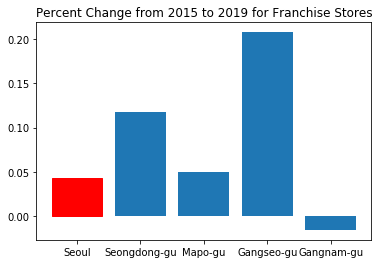

In [77]:
fig, ax = plt.subplots()
plot = plt.bar(c_f.index, c_f[0])
plot[0].set_color('red')
plt.title("Percent Change from 2015 to 2019 for Franchise Stores")
#ax.annotate(franchise_growth["Seoul"])

Text(0.5, 1.0, 'Percent Change from 2015 to 2019 for Total Stores')

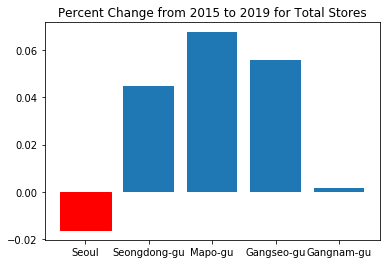

In [78]:
#fig, ax = plt.subplots()
plot2 = plt.bar(c_t.index, c_t[0])
plot2[0].set_color('red')
plt.title("Percent Change from 2015 to 2019 for Total Stores")

In [ ]:
#For the life of me, could not figure out how to get these bar charts annotated! 

# Area Charts of Changes in Residential and Work Population 

In [63]:
# Pull relevant data

res_ha = seoul.loc[[0,4,14,16,23], ['Q2-15 Residential Population (persons per ha)', 'Q2-16 Residential Population (persons per ha)', 'Q2-17 Residential Population (persons per ha)', 'Q2-18 Residential Population (persons per ha)', 'Q2-19 Residential Population (persons per ha)']]

work_ha = seoul.loc[[0,4,14,16,23], ['Q2-15 Work Population (persons per ha)', 'Q2-16 Work Population (persons per ha)', 'Q2-17 Work Population (persons per ha)', 'Q2-18 Work Population (persons per ha)', 'Q2-19 Work Population (persons per ha)']]



In [64]:
res_ha.columns = ["2015", "2016", "2017", "2018", "2019"]
work_ha.columns = ["2015", "2016", "2017", "2018", "2019"]

In [ ]:
#data is in persons per hectare so gotta convert it to persons per square mile

In [65]:
res_sq = res_ha * 258.999
res_sq

,2015,2016,2017,2018,2019
0,39108.849,37554.855,42216.837,41439.840,41439.840
4,40921.842,38849.850,47396.817,47655.816,48173.814
14,35741.862,34446.867,39885.846,39108.849,39108.849
16,31597.878,31338.879,36000.861,36000.861,35741.862
23,35482.863,33928.869,38072.853,36518.859,36777.858


In [66]:
work_sq = work_ha * 258.999
work_sq

,2015,2016,2017,2018,2019
0,19165.926,19942.923,20460.921,20978.919,21496.917
4,25122.903,26158.899,27971.892,29525.886,30043.884
14,21496.917,22014.915,23309.910,23309.910,23568.909
16,8028.969,10359.960,10618.959,11654.955,12172.953
23,52317.798,52317.798,52835.796,54648.789,55425.786


# Residential and Work Population Density in Seoul (persons per square mile)

In [67]:
seoul_pop = pd.DataFrame({
    "Residential Pop": res_sq.iloc[0, :].values,
    "Work Pop": work_sq.iloc[0, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])

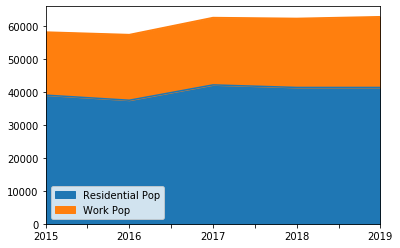

In [68]:
seoul_pop.plot.area()

# Residential and Work Population Density in Districts of Interest (persons per square mile)

### couldn't figure out how to get these labeled -- they are in this order from left to right, top to bottom: 
### Seoungsu-dong, Mapo-Gu, Gangseo-Gu, Gangnam-Gu

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


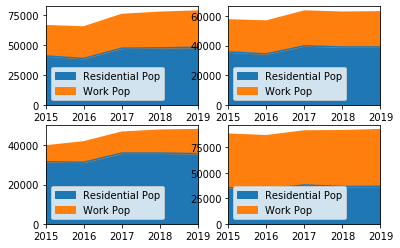

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad = 200.0)
Seongdong_pop.plot.area(ax = axes[0, 0])
mapo_pop.plot.area(ax = axes[0, 1])
gangseo_pop.plot.area(ax = axes[1, 0])
Gangnam_pop.plot.area(ax = axes[1, 1])

In [70]:
Seongdong_pop = pd.DataFrame({
    "Residential Pop": res_sq.iloc[1, :].values,
    "Work Pop": work_sq.iloc[1, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])
#Seongdong_pop.plot.area()

In [71]:
mapo_pop = pd.DataFrame({
    "Residential Pop": res_sq.iloc[2, :].values,
    "Work Pop": work_sq.iloc[2, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])


In [72]:
gangseo_pop = pd.DataFrame({
    "Residential Pop": res_sq.iloc[3, :].values,
    "Work Pop": work_sq.iloc[3, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])
#gangseo_pop.plot.area()

In [73]:
Gangnam_pop = pd.DataFrame({
    "Residential Pop": res_sq.iloc[4, :].values,
    "Work Pop": work_sq.iloc[4, :].values}, index = ["2015", "2016", "2017", "2018", "2019"])


# Percent Change In Monthly Rent from 2015 to 2019 for Retail Spaces

In [79]:
rents = seoul.loc[[0,4,14,16,23], ["Q2-15 Monthly rent per 3.3 meters squared (KRW)", 
             "Q2-19 Monthly rent per 3.3 meters squared (KRW)"]]

In [80]:
rents

,Q2-15 Monthly rent per 3.3 meters squared (KRW),Q2-19 Monthly rent per 3.3 meters squared (KRW)
0,95907.0,117827.0
4,79230.0,106550.0
14,107943.0,119977.0
16,78935.0,106206.0
23,113218.0,132143.0


In [81]:
rent_2015 = rents.iloc[:, 0].values
rent_2019 = rents.iloc[:, 1].values
rent_change = (rent_2019 - rent_2015)/abs(rent_2015)
r_c_t = rent_change.T

Text(0.5, 1.0, 'Percent Change In Monthly Rent')

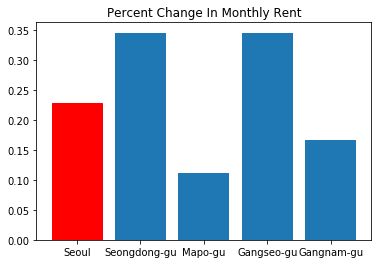

In [82]:
plot3 = plt.bar(['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Gangseo-gu', 'Gangnam-gu'], r_c_t)
plot3[0].set_color('red')
plt.title("Percent Change In Monthly Rent")

# Archived

In [43]:
# Make new percent change tables
#total_pchange = pd.DataFrame()
# total = total_stores.iloc[:, 1:6].pct_change()
# total.index = ["2015", "2016", "2017", "2018", "2019"]
# total.columns = ['Seoul', 'Seongdong-gu', 'Mapo-gu', 'Gangseo-gu', 'Gangnam-gu']
# total

In [44]:
# not what we wanted
#subset = total.iloc[1:, :]['Seoul']
#subset.plot(label = 'Seoul', color = 'black')
#y = np.arange(min(subset.values), max(subset.values), 0.01)
#plt.yticks(y)

#subset1 = total.iloc[1:, :]['Mapo-gu']
#subset1.plot(label = 'Mapo-gu', color = 'green')
#plt.title("Total Number of Stores")

In [ ]:
plt.plot(total_num['Year'], total_num.iloc[:, 1], color = 'red')
plt.plot(franchise_stores['Year'], franchise_stores.iloc[:, 1], color = 'blue')

#xticklabels(('2015','2016','2017','2018','2019'))

In [ ]:
# add one more for the other subplot
# https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html#sphx-glr-gallery-subplots-axes-and-figures-subplots-demo-py


# x = np.arange(1, 6)
# width = 0.3

# fig, ax = plt.subplots() # 2 rows, 2 columns
# fig.tight_layout(pad = 3.0)
# ax2 = ax.bar(x+width/2, general_num[0], width, label = 'General') 
# ax1 = ax.bar(x-width/2, franchise_stores[0], width, label = 'Franchise') 
# ax.set_xticklabels(general_num["Year"].values)

# ax[0, 0].plot(general_num['Year'], general_num.iloc[:, 1], color = 'red')
# ax[0, 0].plot(franchise_stores['Year'], franchise_stores.iloc[:, 1], color = 'blue')
# plt.xticks(rotation=70)

